<ipython-input-1-6e6caf44fab4>:1: DeprecationWarning: the formatter module is deprecated
  from formatter import NullFormatter


1599571593036903


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

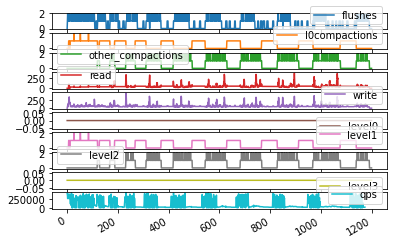

In [1]:
from formatter import NullFormatter

import numpy as np
from matplotlib import pylab as plt

from feature_selection import vectorize_by_compaction_output_level
from main import load_log_and_qps
from traversal import get_log_dirs, get_log_and_std_files

log_prefix_dir = "log_files"
dirs = get_log_dirs(log_prefix_dir)

log_dir = dirs[0]
stdout_file, LOG_file, report_csv = get_log_and_std_files(log_dir)

data_set = load_log_and_qps(LOG_file, report_csv)
bucket_df = vectorize_by_compaction_output_level(data_set)
bucket_df["qps"] = data_set.qps_df["interval_qps"]

bucket_df.plot(subplots=True)


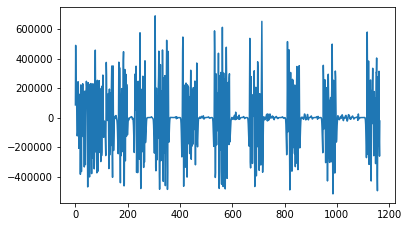

In [2]:
from scipy import signal
import pandas as pd
qps_ori = bucket_df["qps"].to_numpy()
widths = np.arange(1, 5)
cwt_matr = signal.cwt(qps_ori,signal.ricker,widths)
cwt_matr_df = pd.DataFrame(cwt_matr.T)
cwt_matr_df.plot(subplots=True)

icwt = []
for row in cwt_matr_df.iloc:
    icwt.append(row[0]+row[1])
plt.clf()
plt.plot(icwt)

Wavelet seems not that suitable

Change to increasing the interval time window

<AxesSubplot:>

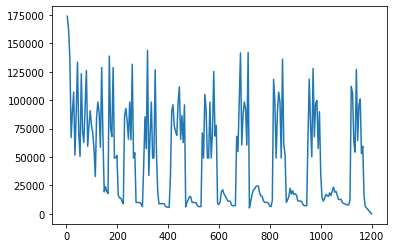

In [3]:
df = bucket_df["qps"]
df = pd.DataFrame(df,columns=["qps"])

df = df.groupby(df.index // 5)['qps'].transform('sum')[lambda x: ~(x.duplicated(keep='last'))]
df = df.div(10)
df.plot()

/home/jinghuan/anaconda3/envs/anormally_detection/lib/python3.8/site-packages/tensorflow_probability/python/distributions/hidden_markov_model.py:497: UserWarning: HiddenMarkovModel.log_prob in TFP versions < 0.12.0 had a bug in which the transition model was applied prior to the initial step. This bug has been fixed. You may observe a slight change in behavior.
  warnings.warn(


step 0: loss [4146593.   4082313.2   439549.53  430415.4   430461.03  404755.44
  361025.72  360728.38  358180.28  246476.23]
step 20: loss [4095352.8    739848.2    311849.78   226155.12   144760.97   124670.14
  102020.95    68444.34    55330.387   47174.2  ]
step 40: loss [4095703.2    759191.1    305523.66   214320.86   123180.76   113739.234
   94902.09    62565.336   49823.69    42234.754]
step 60: loss [4095384.2    728043.4    305075.4    213297.61   121733.93   111144.43
   91659.03    60338.504   47716.63    40985.76 ]
step 80: loss [4095338.     728353.25   305053.34   213034.36   121491.85   110970.48
   90389.69    60291.023   47573.56    40753.664]
step 100: loss [4095336.     727782.2    305047.1    213030.06   121432.61   110937.95
   89898.95    60243.84    47535.824   40727.27 ]
step 120: loss [4095337.5    727757.8    305044.03   213028.86   121424.99   110933.055
   89655.19    60236.94    47532.453   40727.   ]
step 140: loss [4095338.8    727758.7    305043.94   2

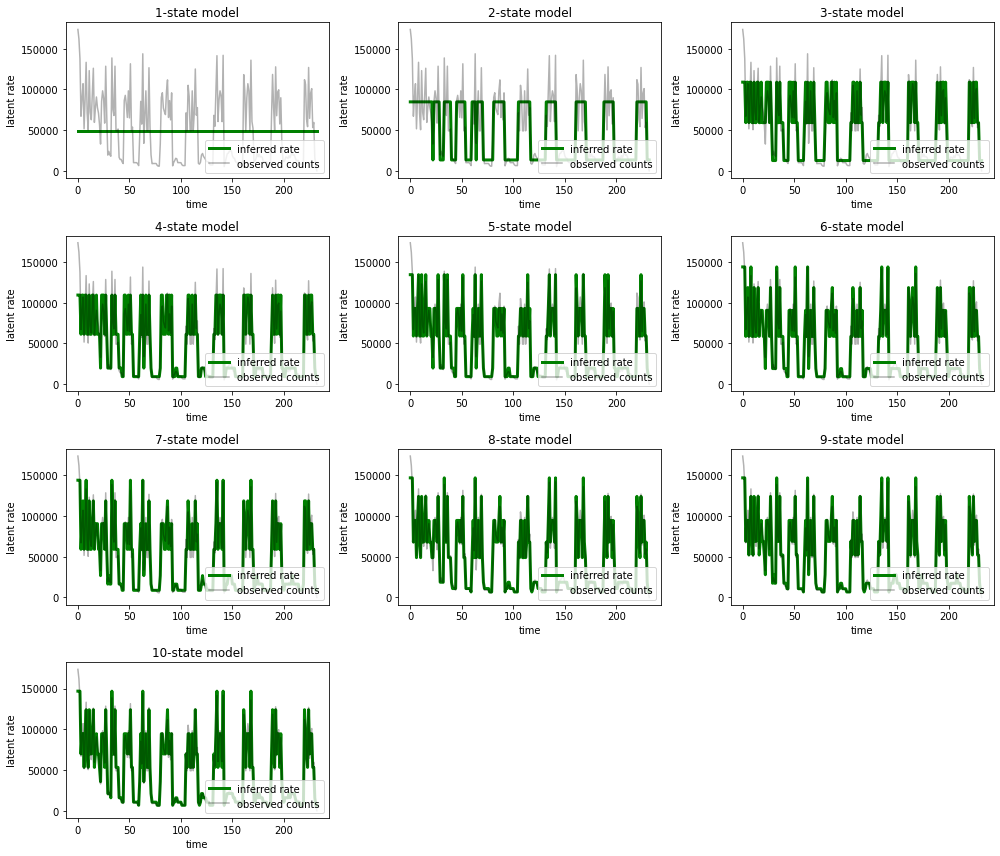

<Figure size 1008x864 with 0 Axes>

In [6]:
import hmm_utils
from hmm_utils import *
df = df.astype(np.float32)
list_of_moment_map = get_list_of_moment_map(df.to_numpy())